 ## QR Factorization

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

Using `np.random.randn(5,5)` to generate a matrix of shape (5, 5), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1. 

Source: [numpy.random.randn - NumPy Docs](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

In [ ]:
# Generating a 5x5 random matrix:
X = np.random.randn(5, 5)
print(X) 

[[ 1.08556443 -1.28925009  0.4022599   0.40418302 -0.09831113]
 [ 1.37627311  1.29803582  0.00810872  0.14528888  0.91048148]
 [-0.26040187  0.01979778  1.86659748 -0.55656142 -0.01489163]
 [-0.04350017 -1.06585028 -0.00246175 -0.07568192 -0.60882791]
 [ 0.30008458  0.82015357  0.41909638  0.84989735  1.55590237]]


Defining `gram_schmidt` and `QR_factorization`:

In [ ]:
# Gram-Schmidt Algorithm [IALA-PC]:

def gram_schmidt(a):
  q = []
  for i in range(len(a)):
    # Orthogonalization:
    q_tilde = a[i]
    for j in range(len(q)):
      q_tilde = q_tilde - (q[j] @ a[i])*q[j]
    # Test for Dependennce:
    if np.sqrt(sum(q_tilde**2)) <= 1e-10:
      print("Vectors are linearly dependent.")
      print("GS algorithm terminates at iteration ", i+1)
      return q
    # Normalization:
    else:
      q_tilde = q_tilde / np.sqrt(sum(q_tilde**2))
      q.append(q_tilde)
  print("Vectors are linearly independent.")
  return q

In [ ]:
# QR Factorization Function [IALA-PC]:

def QR_factorization(A):
  Q_transpose = np.array(gram_schmidt(A.T))
  R = Q_transpose @ A
  Q = Q_transpose.T
  return Q, R

In [ ]:
Q, R = QR_factorization(X)
print(Q)
print(R)

Vectors are linearly independent.
[[ 6.03806468e-01 -6.76784269e-01  1.68737665e-01  1.86095968e-01
  -3.38048360e-01]
 [ 7.65502795e-01  4.51418510e-01 -1.90000747e-04 -3.82433190e-01
   2.52926112e-01]
 [-1.44839243e-01  3.30932448e-02  9.60325227e-01 -2.34662431e-01
   2.52077680e-02]
 [-2.41954161e-02 -4.71873498e-01 -1.60893732e-02 -2.28289638e-02
   8.80891568e-01]
 [ 1.66911340e-01  3.38267086e-01  2.21459147e-01  8.73799478e-01
   2.12476591e-01]]
[[ 1.79786817e+00  3.75006628e-01  4.87493075e-02  5.79567964e-01
   9.14200708e-01]
 [ 6.46211602e-17  2.23953420e+00 -6.38828333e-02  9.68275453e-02
   1.29065112e+00]
 [ 6.71829039e-17 -1.56020392e-17  1.95326784e+00 -2.76871460e-01
   3.23301879e-01]
 [ 2.92148733e-16  2.12981396e-16 -2.83486635e-16  8.94625192e-01
   1.01044645e+00]
 [-6.84724094e-15  4.21301116e-15  2.89854087e-15 -5.98258777e-15
   5.74245322e-02]]


<u>Note:</u> 

In the following computations we round all the entries of the output matrices to five digits following the decimal point using `np.round(M, 5)`, where M is a computed matrix, for ease of understanding and visualization. With this, a number like **1.00000000e+00** will simply be displayed as **1.** and **-7.93311447e-17** will simply be displayed as **-0.** The original output matrices could be displayed by removing the hash "#" sign from the first print command of each block.

### Part 1a

In [ ]:
# Part 1a:
#print(Q.T @ Q)
print(np.round(Q.T @ Q, 5))

# Expected Result: Identity Matrix of shape 5x5 as Q @ Q.T = I

[[ 1. -0.  0.  0. -0.]
 [-0.  1. -0.  0.  0.]
 [ 0. -0.  1. -0.  0.]
 [ 0.  0. -0.  1. -0.]
 [-0.  0.  0. -0.  1.]]


### Part 1b

In [ ]:
# Part 1b:
#print(Q @ Q.T)
print(np.round(Q @ Q.T, 5))

# Expected Result: Identity Matrix of shape 5x5 as Q @ Q.T = I

[[ 1. -0. -0. -0.  0.]
 [-0.  1.  0. -0. -0.]
 [-0.  0.  1.  0.  0.]
 [-0. -0.  0.  1. -0.]
 [ 0. -0.  0. -0.  1.]]


### Part 1c

In [ ]:
# Part 1c:
#print(R)
print(np.round(R, 5))

# Expected Result: Upper Triangular Matrix of shape 5x5

[[ 1.79787  0.37501  0.04875  0.57957  0.9142 ]
 [ 0.       2.23953 -0.06388  0.09683  1.29065]
 [ 0.      -0.       1.95327 -0.27687  0.3233 ]
 [ 0.       0.      -0.       0.89463  1.01045]
 [-0.       0.       0.      -0.       0.05742]]


### Part 1d

In [ ]:
# Part 1d:
#print((Q @ R) - X)
print(np.round((Q @ R) - X, 5))

# Expected Result: Zero Matrix of shape 5x5 as X = Q@R

[[ 0. -0. -0.  0.  0.]
 [-0.  0.  0. -0. -0.]
 [-0.  0. -0. -0. -0.]
 [-0.  0.  0. -0. -0.]
 [-0.  0.  0. -0. -0.]]


 ## Visualization

In [ ]:
# Define matrix Y:
Y = np.array([
              [1, -4], 
              [2, 1]
])

In [ ]:
# A generalized for-loop algorithm for extracting individual column vectors from a matrix (as applied to Y):
vectors = []
for i in range(0, len(Y), 1):
  vectors.append(Y[:, i])

print(vectors)

[array([1, 2]), array([-4,  1])]


The lines of code below were mainly influenced by the following resources:
- [matplotlib.pyplot.quiver - Matplotlib Docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)
- [How to Plot 2D Math Vectors with Matplotlib - Stack Overflow](https://stackoverflow.com/questions/12265234/how-to-plot-2d-math-vectors-with-matplotlib)
- [How to Add Two Vectors in 2D in Python Graphically](https://mrcreamio.wordpress.com/2018/10/26/how-to-add-two-vectors-in-2d-in-python-graphically/)

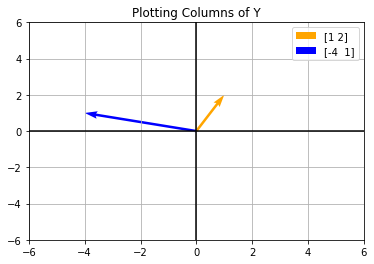

In [ ]:
# Extra - Plotting the column vectors using Matplotlib:

vec1 = vectors[0]
vec2 = vectors[1]

v1 = np.array([[0, 0, vec1[0], vec1[1]]])
v2 = np.array([[0, 0, vec2[0], vec2[1]]])

X1, Y1, U1, V1 = zip(*v1)
X2, Y2, U2, V2 = zip(*v2)

plt.figure()
ax = plt.gca()
ax.quiver(X1, Y1, U1, V1, angles='xy', scale_units='xy', scale=1, color='orange', label=str(vectors[0]))
ax.quiver(X2, Y2, U2, V2, angles='xy', scale_units='xy', scale=1, color='blue', label=str(vectors[1]))


ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title("Plotting Columns of Y")
plt.grid()
plt.legend()
plt.draw()
plt.show()

In [ ]:
Q, R = QR_factorization(Y)
print(Q)
print(R)

Vectors are linearly independent.
[[ 0.4472136  -0.89442719]
 [ 0.89442719  0.4472136 ]]
[[ 2.23606798e+00 -8.94427191e-01]
 [-1.11022302e-16  4.02492236e+00]]


In [ ]:
# Extracting columns of Q:
vectors = []
for i in range(0, len(Q), 1):
  vectors.append(Q[:, i])

print(vectors)

[array([0.4472136 , 0.89442719]), array([-0.89442719,  0.4472136 ])]


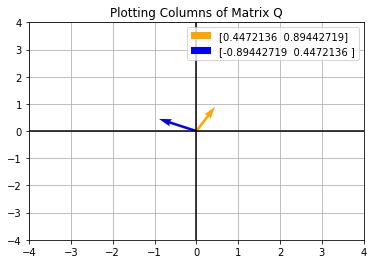

In [ ]:
# Plotting columns of Q:

vec1 = vectors[0]
vec2 = vectors[1]

v1 = np.array([[0, 0, vec1[0], vec1[1]]])
v2 = np.array([[0, 0, vec2[0], vec2[1]]])

X1, Y1, U1, V1 = zip(*v1)
X2, Y2, U2, V2 = zip(*v2)

plt.figure()
ax = plt.gca()
ax.quiver(X1, Y1, U1, V1, angles='xy', scale_units='xy', scale=1, color='orange', label=str(vectors[0]))
ax.quiver(X2, Y2, U2, V2, angles='xy', scale_units='xy', scale=1, color='blue', label=str(vectors[1]))


ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.title("Plotting Columns of Matrix Q")
plt.grid()
plt.legend()
plt.draw()
plt.show()

The following lines of code were implemented based on documentation provided by: [matplotlib.pyplot.matshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html)

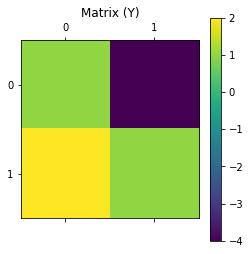

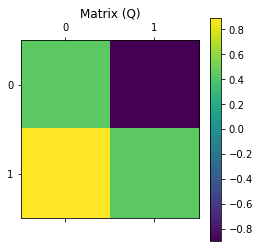

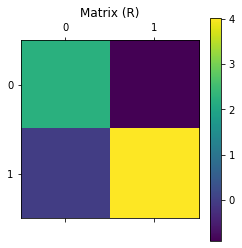

In [ ]:
# Extra - Plotting Y, Q, and R using Matplotlib's matshow() module:
Titles = ["Matrix (Y)", "Matrix (Q)", "Matrix (R)"]
Matrices = [Y, Q, R]
for i in range(3):
  plt.matshow(Matrices[i])
  plt.title(Titles[i])
  plt.colorbar()
  plt.show()

## Taylor Expansions


[3.5474424 4.2974424 4.2974424 2.1487212]


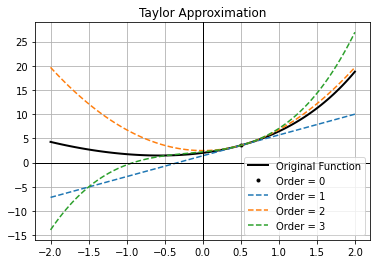

In [ ]:
from jax import grad 
import jax.numpy as jnp

# Defining function:
def f(x):
  return x**2 + 2*jnp.exp(x)

# Computing coefficients:
n = 3 # Number of Coefficients - 1
a = 0.5 # Center
coeffs = [f(a),]

for i in range(n):
  deriv = grad(f)
  coeffs.append(deriv(a)/(np.math.factorial(i)))

coeffs = np.array(coeffs)
print(coeffs)

# Timeline (Domain)
x = (np.linspace(-2, 2, 100))

# Orders of Taylor Approximations:
T0 = coeffs[0]
T1 = coeffs[0] + coeffs[1]*(x-a)
T2 = coeffs[0] + coeffs[1]*(x-a) + coeffs[2]*(x-a)**2
T3 = coeffs[0] + coeffs[1]*(x-a) + coeffs[2]*(x-a)**2 + coeffs[3]*(x-a)**3

# Plotting:
plt.plot(x, f(x), color = "k", linewidth = 2, label = "Original Function")
plt.plot(a, f(a), '.', label = "Order = 0", color = "k", linewidth=2)
plt.plot(x, T1, linestyle="--", label = "Order = 1")
plt.plot(x, T2, linestyle="--", label = "Order = 2")
plt.plot(x, T3, linestyle="--", label = "Order = 3")



# Plot Formatting:
plt.axvline(x=0, linewidth=1, color="k")
plt.axhline(y=0, linewidth=1, color="k")

plt.title("Taylor Approximation")
plt.legend(loc="best")
plt.grid()
plt.show()
